Teste dijkstra

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

ORIENTADO

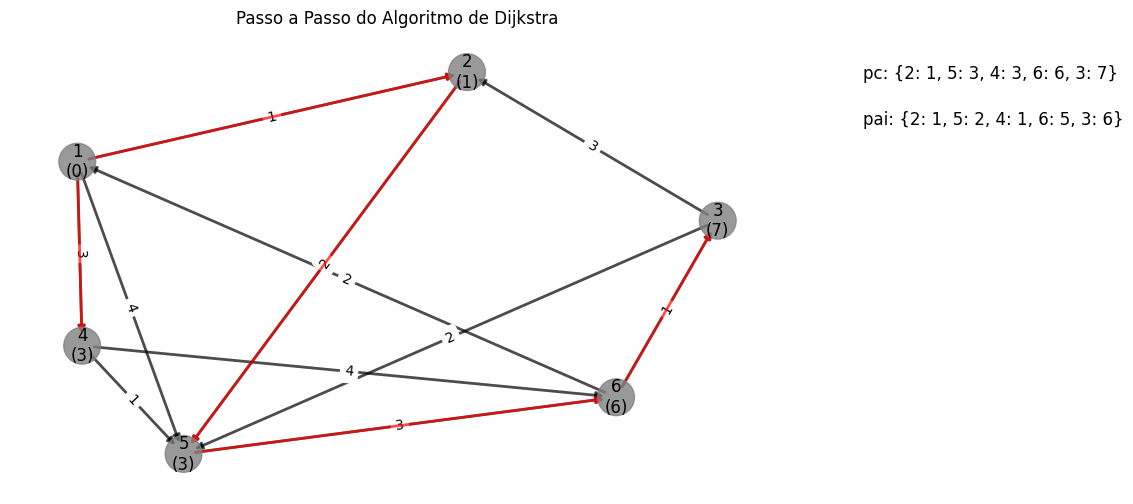

In [12]:

def dijkstra_step_by_step(G, source):
    # Inicialização
    visited = {source: 0}  # Dicionário para armazenar distâncias
    path = {}
    pc = {}  # Vetor para os pesos mínimos
    pai = {}  # Vetor para os predecessores
    
    # Passo a passo do algoritmo de Dijkstra
    for _ in range(len(G) - 1):
        min_node = None
        min_dist = float('inf')
        
        for node in G.nodes():
            if node not in visited:
                continue
            for neighbor, edge_data in G[node].items():
                if neighbor in visited:
                    continue
                distance = visited[node] + edge_data['weight']
                if distance < min_dist:
                    min_node = neighbor
                    min_dist = distance
                    path[min_node] = node
                    pc[min_node] = min_dist
                    pai[min_node] = node
        
        if min_node is None:
            break
        
        visited[min_node] = min_dist
    
    return visited, path, pc, pai

def plot_dijkstra_progress(G, source, visited, path, pc, pai):
    pos = nx.spring_layout(G)  # Layout para o plot
    edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
    
    # Iterando sobre os vértices para colorir conforme foram visitados
    node_colors = ['lightblue' if node not in visited else 'gray' for node in G.nodes()]
    node_labels = {node: str(node) + f"\n({visited[node]})" for node in G.nodes()}
    
    # Criando o plot
    plt.figure(figsize=(10, 6))
    
    # Plotando as arestas
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black', width=2, alpha=0.7)
    
    # Plotando os vértices
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors, alpha=0.8)
    
    # Plotando as etiquetas dos vértices
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)
    
    # Plotando as etiquetas das arestas
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    # Destacando o caminho mínimo
    if path:
        path_edges = [(path[node], node) for node in path]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, alpha=0.7)
    
    # Adicionando legenda para pc e pai
    plt.text(1.1, 0.9, f"pc: {pc}", transform=plt.gca().transAxes, fontsize=12)
    plt.text(1.1, 0.8, f"pai: {pai}", transform=plt.gca().transAxes, fontsize=12)
    
    plt.title("Passo a Passo do Algoritmo de Dijkstra")
    plt.axis('off')
    plt.show()

# Criando o grafo G2
G2 = nx.DiGraph()
G2.add_nodes_from([1, 2, 3, 4, 5, 6])
G2.add_weighted_edges_from([
    (1, 2, 1), (1, 5, 4), (1, 4, 3),
    (2, 5, 2),
    (4, 5, 1), (4, 6, 4),
    (3, 2, 3), (3, 5, 2),
    (5, 6, 3), (6, 3, 1), (6, 1, 2)
])

# Executando o algoritmo de Dijkstra passo a passo
visited, path, pc, pai = dijkstra_step_by_step(G2, source=1)

# Plotando o passo a passo do algoritmo de Dijkstra
plot_dijkstra_progress(G2, source=1, visited=visited, path=path, pc=pc, pai=pai)


Não orientado

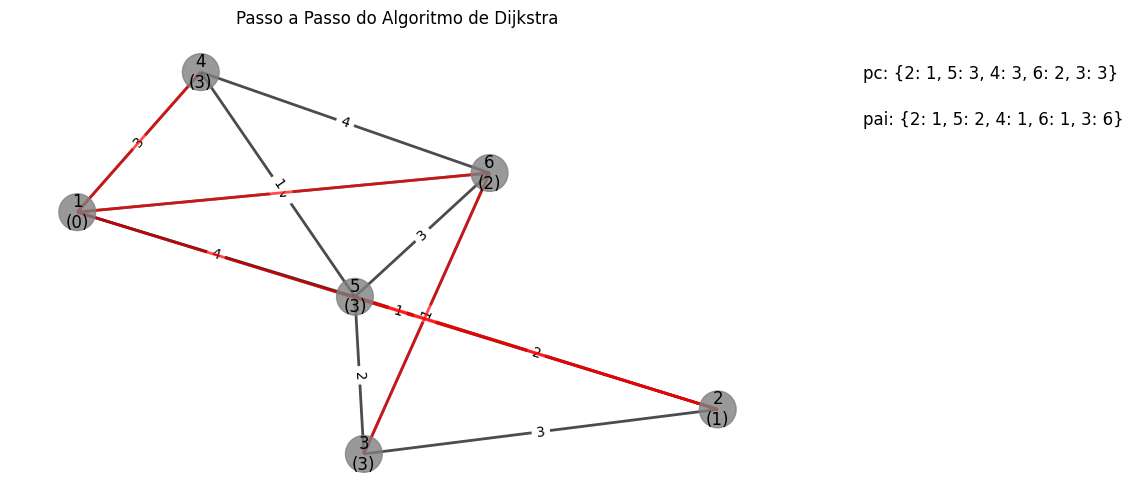

In [13]:

def dijkstra_step_by_step(G, source):
    # Inicialização
    visited = {source: 0}  # Dicionário para armazenar distâncias
    path = {}
    pc = {}  # Vetor para os pesos mínimos
    pai = {}  # Vetor para os predecessores
    
    # Passo a passo do algoritmo de Dijkstra
    for _ in range(len(G) - 1):
        min_node = None
        min_dist = float('inf')
        
        for node in G.nodes():
            if node not in visited:
                continue
            for neighbor in G[node]:
                if neighbor in visited:
                    continue
                distance = visited[node] + G[node][neighbor]['weight']
                if distance < min_dist:
                    min_node = neighbor
                    min_dist = distance
                    path[min_node] = node
                    pc[min_node] = min_dist
                    pai[min_node] = node
        
        if min_node is None:
            break
        
        visited[min_node] = min_dist
    
    return visited, path, pc, pai

def plot_dijkstra_progress(G, source, visited, path, pc, pai):
    pos = nx.spring_layout(G)  # Layout para o plot
    edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
    
    # Iterando sobre os vértices para colorir conforme foram visitados
    node_colors = ['lightblue' if node not in visited else 'gray' for node in G.nodes()]
    node_labels = {node: str(node) + f"\n({visited[node]})" for node in G.nodes()}
    
    # Criando o plot
    plt.figure(figsize=(10, 6))
    
    # Plotando as arestas
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black', width=2, alpha=0.7)
    
    # Plotando os vértices
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors, alpha=0.8)
    
    # Plotando as etiquetas dos vértices
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)
    
    # Plotando as etiquetas das arestas
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    # Destacando o caminho mínimo
    if path:
        path_edges = [(path[node], node) for node in path]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, alpha=0.7)
    
    # Adicionando legenda para pc e pai
    plt.text(1.1, 0.9, f"pc: {pc}", transform=plt.gca().transAxes, fontsize=12)
    plt.text(1.1, 0.8, f"pai: {pai}", transform=plt.gca().transAxes, fontsize=12)
    
    plt.title("Passo a Passo do Algoritmo de Dijkstra")
    plt.axis('off')
    plt.show()

# Criando o grafo G2 (não orientado)
G2 = nx.Graph()
G2.add_nodes_from([1, 2, 3, 4, 5, 6])
G2.add_weighted_edges_from([
    (1, 2, 1), (1, 5, 4), (1, 4, 3),
    (2, 5, 2),
    (4, 5, 1), (4, 6, 4),
    (3, 2, 3), (3, 5, 2),
    (5, 6, 3), (6, 3, 1), (6, 1, 2)
])

# Executando o algoritmo de Dijkstra passo a passo
visited, path, pc, pai = dijkstra_step_by_step(G2, source=1)

# Plotando o passo a passo do algoritmo de Dijkstra
plot_dijkstra_progress(G2, source=1, visited=visited, path=path, pc=pc, pai=pai)
